# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [3]:
import pandas as pd

In [1]:
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
dataset_url = 'Discriptors_class_class01_pIC50.csv'
df = pd.read_csv(dataset_url)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class,pIC50,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.124939,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,7.000000,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,inactive,4.301030,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.522879,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.096910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.590067,1
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.621602,1
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.387216,1
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.200659,1


In [4]:
df['bioactivity_class01'] = df.bioactivity_class01.astype('category')
df['bioactivity_class'] = df.bioactivity_class.astype('category')

Text(0, 0.5, 'pIC50 value')

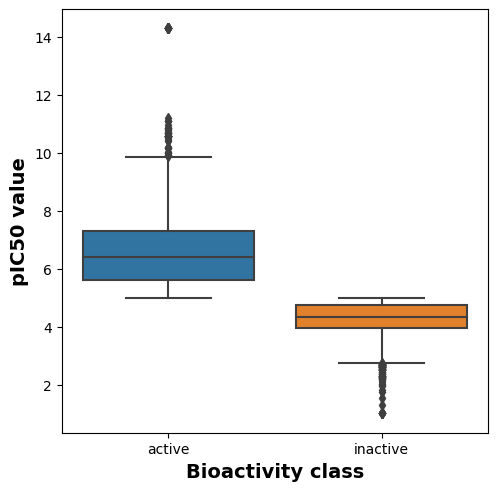

In [5]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
#plt.savefig("boxplot_classes_pIC50.png")

# Remove low variance features

In [6]:
df = df[(df.pIC50 > 3) & (df.pIC50 < 9.8)]
df = df.reset_index(drop = True)

Text(0, 0.5, 'pIC50 value')

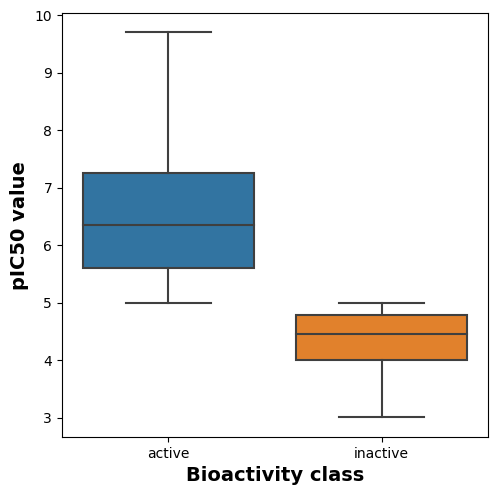

In [7]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
#plt.savefig("boxplot_classes_pIC50_Noutlayers.png")

In [8]:
X = df.drop(['bioactivity_class', 'bioactivity_class01', 'pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5602,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5603,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5604,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train = df.drop(['bioactivity_class', 'pIC50'], axis=1)

In [10]:
Y = df.bioactivity_class01
Y

0       1
1       1
2       0
3       1
4       1
       ..
5601    1
5602    1
5603    1
5604    1
5605    1
Name: bioactivity_class01, Length: 5606, dtype: category
Categories (2, int64): [0, 1]

Text(0, 0.5, 'Frequency')

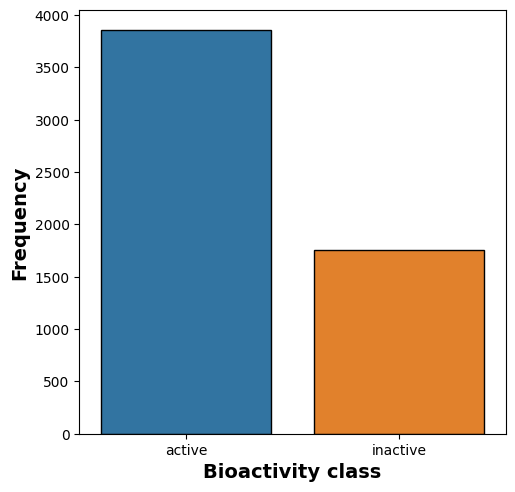

In [11]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

In [12]:
df['bioactivity_class'].value_counts()

bioactivity_class
active      3853
inactive    1753
Name: count, dtype: int64

<Axes: ylabel='count'>

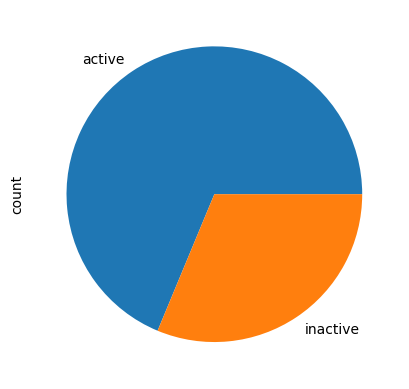

In [13]:
df['bioactivity_class'].value_counts().plot.pie()

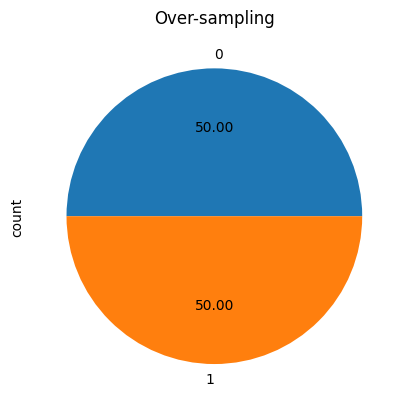

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = SMOTE(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [15]:
X = X_res
Y = y_res

In [16]:
X.shape

(7706, 881)

In [17]:
Y.shape

(7706,)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
X_train.shape, Y_train.shape

((6164, 881), (6164,))

In [20]:
X_test.shape, Y_test.shape

((1542, 881), (1542,))

In [21]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Classification model

In [24]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
import lightgbm as lbt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

In [25]:
model = lbt.LGBMClassifier()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8553826199740596

## Model Prediction

In [26]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Model Performance

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Ytest = Y_test
rounded = Y_pred

# Calculer la matrice de confusion
confusion = confusion_matrix(Ytest, rounded)
print("Matrice de confusion :")
print(confusion)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(Ytest, rounded)
print("Accuracy score : {:.2f}".format(accuracy))

# Calculer la précision (precision) du modèle
precision = precision_score(Ytest, rounded)
print("Précision : {:.2f}".format(precision))

# Calculer le rappel (recall) du modèle
recall = recall_score(Ytest, rounded)
print("Recall score : {:.2f}".format(recall))

# Calculer la F-mesure (F1-score) du modèle
f1 = f1_score(Ytest, rounded)
print("F-mesure : {:.2f}".format(f1))


Matrice de confusion :
[[649 104]
 [119 670]]
Accuracy score : 0.86
Précision : 0.87
Recall score : 0.85
F-mesure : 0.86


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Save Model as Pickle Object

In [29]:
import pickle

In [30]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))